In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.preprocessing import *

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme(style="whitegrid")

## Dataset loading
Here we load the dataset and perform some initial analysis to understand its structure and contents.

In [17]:
raw_data = pd.read_csv('../data/raw/microdata.csv', delimiter=';', encoding='utf-8', encoding_errors='replace')

print('Shape:', raw_data.shape)
print('Memory usage:', raw_data.memory_usage().sum() / 1024**2, 'MB')

print('Dataset info:')
raw_data.info()

raw_data.head()

Shape: (3933955, 76)
Memory usage: 2281.0409240722656 MB
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 2

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Bras�lia,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Bras�lia,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4305108,Caxias do Sul,43,RS,1,1,1,1,1221.00,1193.00,1204.00,1211.00,502.00,498.90,475.60,363.20,DBEBDCECCBCEBBBBDBABDDBBAABCBACDBACECCBAADEBB,ABDEADAADCDABDCADAEABCDDCBAADCCBEBCEBEBDBEAED,ACEBDCABAACAEBAECEBBBAAECBBDEADCAECCCEDDABEED,CEAEACCCDABCDAACEDDBAAEBABDDEEBDAECABDBCBCADE,1,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,1224.00,1192.00,1202.00,1214.00,459.00,508.50,507.20,466.70,DEEBEACCCEBDDBDCCCAEEDCBAAADBCBEEEDCDAAECBEEC,DDAAEEBCCDEADBCDDCBAECABEBDEBDABECECEDCDDAEED,ADBDADAEEEACAABBACADCAEBBAAEBBCDEBBDDADDCADAA,EECBAEDEEDDDBBAADEECDBBBECEAACEAEECDBEDDBCDCB,0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,1.00,0,2311306.00,Quixad�,23.00,CE,2.00,1.00,1.00,2311306,Quixad�,23,CE,1,1,1,1,1222.00,1191.00,1201.00,1212.00,402.50,379.20,446.90,338.30,AECCEAACDEABEEECDBAEEAAADDEABCBCEBACEEDCBEABD,CADEBCEDDEBCBAEBADDCECACADBDEBABDBDBEEDBBEADC,AABBACBCAEDABDADEDAACCAEEEECAACDCADBAEACDEAAE,CDBABEDCEEBBBDECDEBACCAABDEDCBECDECABBDBDEECC,0,CAAADCCCCDDDABDCACDBEEEDCEDAEECCDBEABDBABBAEB,CDAEECABAACEAADECBDAABCDCABADCDEABAABCDDEBADB,BBDABAAEBADACEEDCCDBADBDEDCCEBCACEACAACAACACBB...,DCECACCBDECBEEABEABDDAADDABBBCCBCCDDAEBDADEEB,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


## Data preprocessing
Here we perform data preprocessing steps such as:
- Handling missing values (using mean, median, or mode)
- Removing duplicates
- Validating data consistency

Columns with missing values:
                        Missing Values  Percentage
TP_LOCALIZACAO_ESC             2975449       75.64
CO_UF_ESC                      2975449       75.64
TP_SIT_FUNC_ESC                2975449       75.64
TP_DEPENDENCIA_ADM_ESC         2975449       75.64
SG_UF_ESC                      2975449       75.64
CO_MUNICIPIO_ESC               2975449       75.64
NO_MUNICIPIO_ESC               2975449       75.64
TP_ENSINO                      2594874       65.96
NU_NOTA_CN                     1241528       31.56
CO_PROVA_MT                    1241528       31.56
CO_PROVA_CN                    1241528       31.56
TX_RESPOSTAS_CN                1241528       31.56
TX_GABARITO_CN                 1241528       31.56
NU_NOTA_MT                     1241528       31.56
TX_RESPOSTAS_MT                1241528       31.56
TX_GABARITO_MT                 1241528       31.56
TP_STATUS_REDACAO              1111312       28.25
NU_NOTA_CH                     1111312       28.25
NU

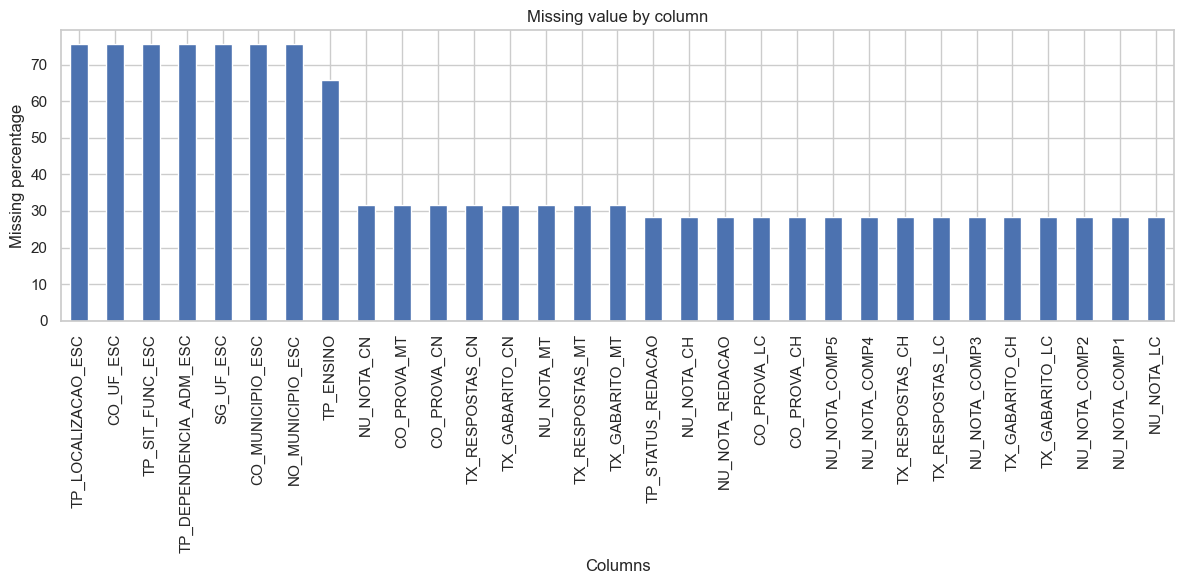

In [18]:
# Analyse missing values
missing = pd.DataFrame({
    'Missing Values': raw_data.isnull().sum(),
    'Percentage': raw_data.isnull().sum() / len(raw_data) * 100
}).sort_values(by='Percentage', ascending=False)

print('Columns with missing values:')
print(missing[missing['Missing Values'] > 0])

plt.figure()
missing[missing['Percentage'] > 0]['Percentage'].plot(kind='bar')
plt.title('Missing value by column')
plt.xlabel('Columns')
plt.ylabel('Missing percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
# Data type optimization
initial_memory = raw_data.memory_usage().sum() / 1024**2
print(f"Initial memory usage: {initial_memory:.2f} MB")

optimized_data = optimize_dtypes(raw_data)
final_memory = optimized_data.memory_usage().sum() / 1024**2
print(f"Optimized memory usage: {final_memory:.2f} MB")
print(f"Memory reduction: {(initial_memory - final_memory) / initial_memory * 100:.2f}%")

2025-03-29 21:41:45,473 - src.data.preprocessing - INFO - Optimizing data types


Initial memory usage: 2281.04 MB
Optimized memory usage: 1977.15 MB
Memory reduction: 13.32%


2025-03-29 21:41:45,971 - src.data.preprocessing - INFO - Mapping categorical variables
2025-03-29 21:41:45,976 - src.data.preprocessing - WARNING - Could not map categories for TP_SEXO: Cannot setitem on a Categorical with a new category (Unknown), set the categories first
2025-03-29 21:41:45,981 - src.data.preprocessing - WARNING - Could not map categories for TP_ESTADO_CIVIL: Cannot setitem on a Categorical with a new category (Unknown), set the categories first
2025-03-29 21:41:45,990 - src.data.preprocessing - WARNING - Could not map categories for TP_COR_RACA: Cannot setitem on a Categorical with a new category (Unknown), set the categories first
2025-03-29 21:41:45,997 - src.data.preprocessing - WARNING - Could not map categories for TP_NACIONALIDADE: Cannot setitem on a Categorical with a new category (Unknown), set the categories first
2025-03-29 21:41:46,002 - src.data.preprocessing - WARNING - Could not map categories for TP_ST_CONCLUSAO: Cannot setitem on a Categorical with

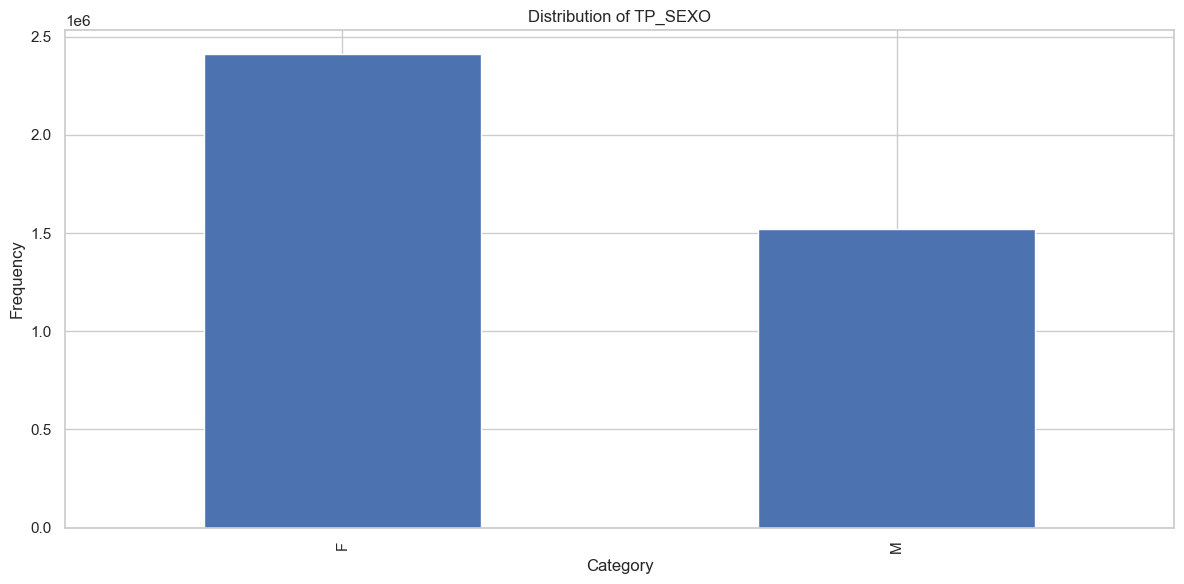

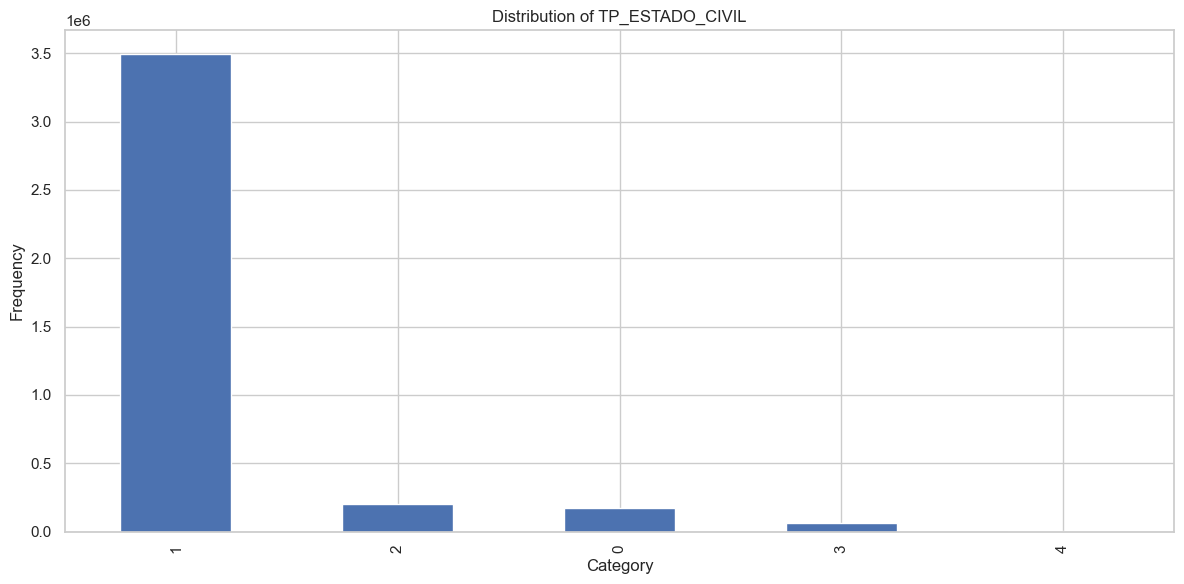

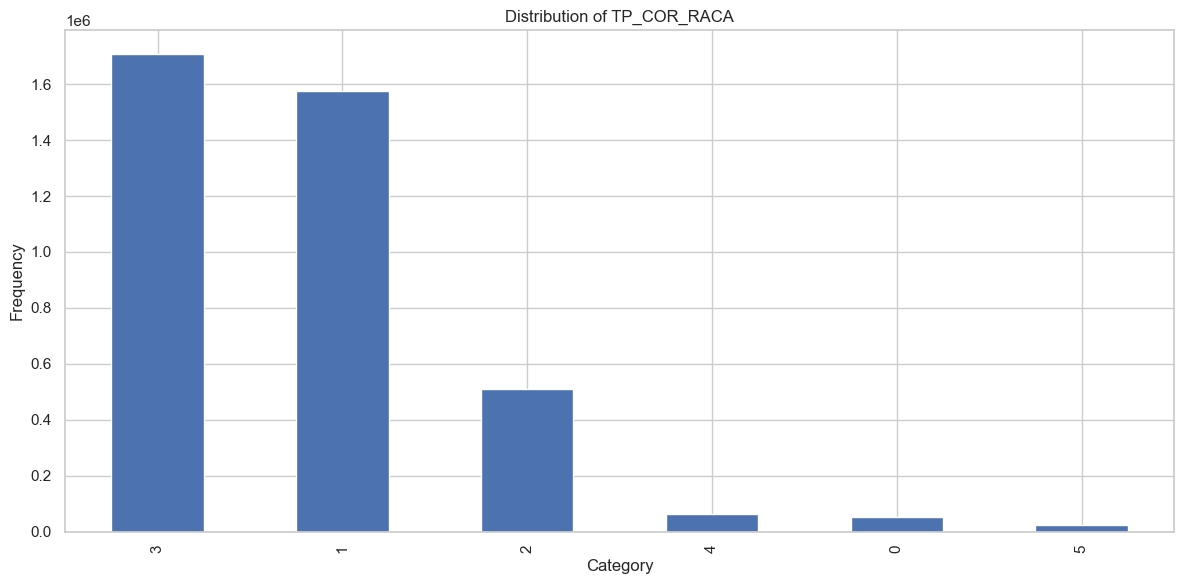

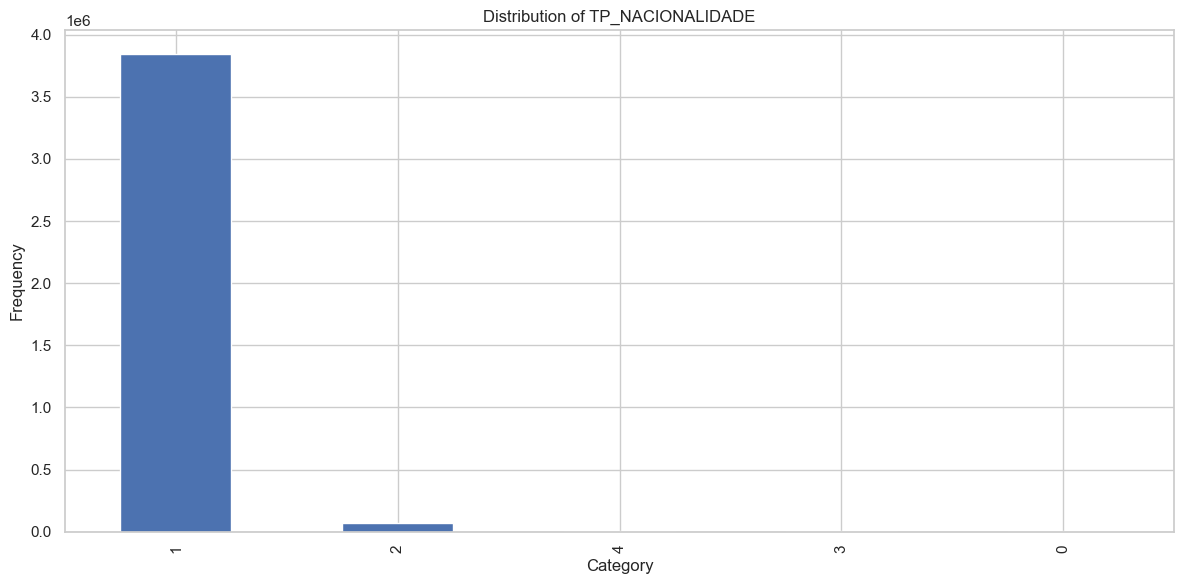

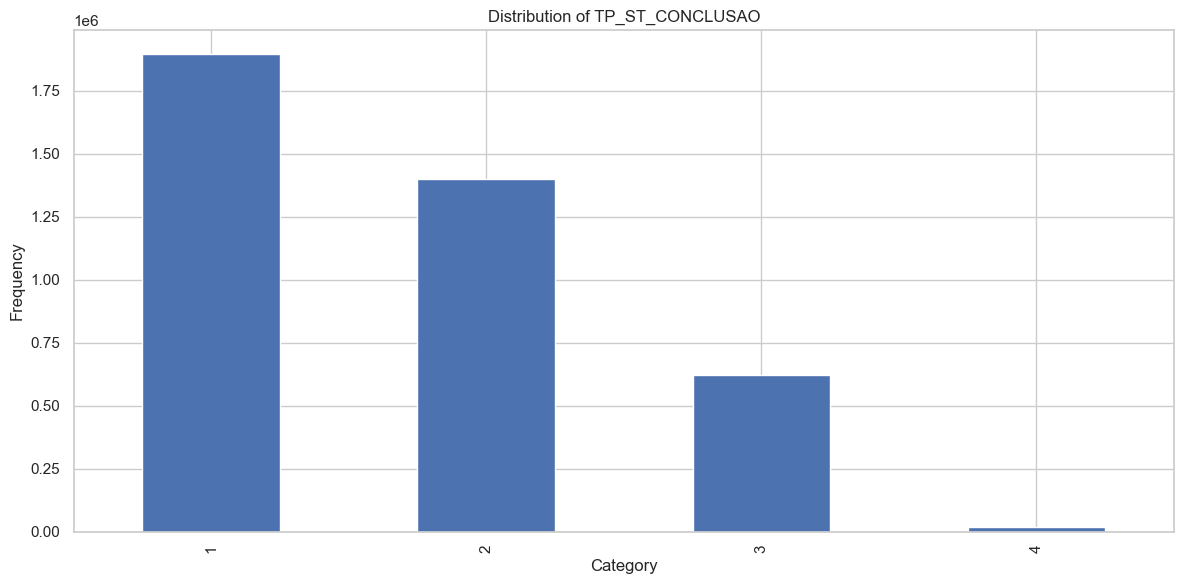

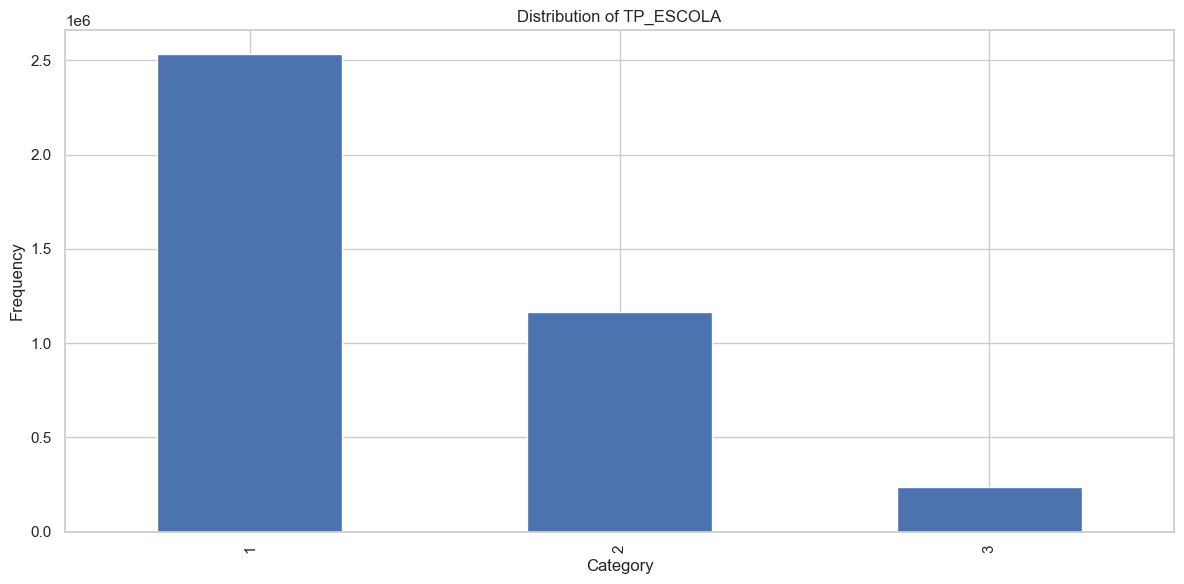

In [20]:
# Category mapping
data = map_categories(optimized_data)

categorical_cols = data.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [21]:
# Missing values handling
data, imputation_values = handle_missing_values(data)

print('Imputation values:')
for col, value in imputation_values.items():
    print(f"{col}: {value}")

# Check if there are still missing values
print('Missing values:', data.isnull().sum()[data.isnull().sum() > 0])

2025-03-29 21:41:47,304 - src.data.preprocessing - INFO - Handling missing values


Imputation values:
TP_ENSINO: 1.0051423326893594
CO_MUNICIPIO_ESC: 3191200.2259099055
CO_UF_ESC: 31.764970693975833
TP_DEPENDENCIA_ADM_ESC: 2.437952396750777
TP_LOCALIZACAO_ESC: 1.0371932987378274
TP_SIT_FUNC_ESC: 1.0165246748585821
CO_PROVA_CN: 1222.6647749409733
CO_PROVA_CH: 1192.657074947133
CO_PROVA_LC: 1202.6550817797363
CO_PROVA_MT: 1212.6647793979187
NU_NOTA_CN: 495.7515563964844
NU_NOTA_CH: 523.35400390625
NU_NOTA_LC: 518.1466064453125
NU_NOTA_MT: 533.8356323242188
TP_STATUS_REDACAO: 1.152401844654106
NU_NOTA_COMP1: 121.5451830075571
NU_NOTA_COMP2: 139.2952279122794
NU_NOTA_COMP3: 118.50904630872554
NU_NOTA_COMP4: 129.79701648419584
NU_NOTA_COMP5: 108.6519974364452
NU_NOTA_REDACAO: 617.7987670898438
NO_MUNICIPIO_ESC: S�o Paulo
SG_UF_ESC: SP
TX_RESPOSTAS_CN: .............................................
TX_RESPOSTAS_CH: .............................................
TX_RESPOSTAS_LC: .............................................
TX_RESPOSTAS_MT: ...................................

In [22]:
# Duplicated rows handling
initial_rows = len(data)
data.drop_duplicates(inplace=True)
final_rows = len(data)

deleted_rows = initial_rows - final_rows

if deleted_rows > 0:
    print(f"Deleted {deleted_rows} duplicated rows")
else:
    print(f"No duplicate rows")

No duplicate rows


In [23]:
# Validate data consistency
issues = validate_data(data)
if issues:
    print('Data Validation Issues:')
    for issue in issues:
        print(f'- {issue}')
else:
    print('No Data Validation Issues Found')

2025-03-29 21:42:27,311 - src.data.preprocessing - INFO - Validating data


No Data Validation Issues Found


## Feature engineering
#### Questions we want to answer
- In which areas of knowledge do candidates perform better/worse?
- Is there a difference in performance between genders?
- How does age group influence performance?
- How does family income influence performance?
- What is the impact of parents' education on performance?
- How does access to technological resources (internet/computer) affect grades?

In [24]:
area_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
subject_map = {
    'NU_NOTA_CN': 'Natural Sciences',
    'NU_NOTA_CH': 'Human Sciences',
    'NU_NOTA_LC': 'Language',
    'NU_NOTA_MT': 'Mathematics',
}

if 'BEST_AREA' not in data.columns and all(col in data.columns for col in area_cols):
    data['BEST_AREA'] = data[area_cols].idxmax(axis=1).map(subject_map)
    data['BEST_AREA'] = data['BEST_AREA'].astype('category')

In [25]:
if 'WORST_AREA' not in data.columns and all(col in data.columns for col in area_cols):
    data['WORST_AREA'] = data[area_cols].idxmin(axis=1).map(subject_map)
    data['WORST_AREA'] = data['WORST_AREA'].astype('category')

In [26]:
income_map = {
    'A': 0,
    'B': 1320,
    'C': 1980,
    'D': 2640,
    'E': 3300,
    'F': 3960,
    'G': 5280,
    'H': 6600,
    'I': 7920,
    'J': 9240,
    'K': 10560,
    'L': 11880,
    'M': 13200,
    'N': 15840,
    'O': 19800,
    'P': 26400,
    'Q': 30000 # Arbitrary high value for 'Q'
}

if 'INCOME' not in data.columns and 'Q006' in data.columns:
    data['INCOME'] = data['Q006'].map(income_map).astype('Int64')

In [27]:
# A	Never attended school.
# B	Did not complete the 4th grade/5th year of elementary school.
# C	Completed the 4th grade/5th year, but did not complete the 8th grade/9th year of elementary school.
# D Completed the 8th grade/9th year of elementary school, but did not complete high school.
# E	Completed high school, but did not complete college.
# F Completed college, but did not complete post-graduate studies.
# G	Completed post-graduate studies.
# H	I don't know.

edu_map = {chr(ord('A') + i): i for i in range(8)}

if 'MOTHER_EDU_ORDINAL' not in data.columns and 'Q001' in data.columns:
    data['MOTHER_EDU_ORDINAL'] = data['Q001'].map(edu_map).astype('Int8')
if 'FATHER_EDU_ORDINAL' not in data.columns and 'Q002' in data.columns:
    data['FATHER_EDU_ORDINAL'] = data['Q002'].map(edu_map).astype('Int8')

In [28]:
# range from 0 to 5
computer_map = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5, # 5 or more computers
}

if 'NUM_COMPUTER' not in data.columns and 'Q024' in data.columns:
    data['NUM_COMPUTER'] = data['Q024'].map(computer_map).astype('Int8')


internet_map = {
    'A': 0, # No internet
    'B': 1, # Internet at home
}

if 'INTERNET' not in data.columns and 'Q025' in data.columns:
    data['INTERNET'] = data['Q025'].map(internet_map).astype('Int8')

In [29]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,BEST_AREA,WORST_AREA,INCOME,MOTHER_EDU_ORDINAL,FATHER_EDU_ORDINAL,NUM_COMPUTER,INTERNET
0,210059085136,2023,14,M,2,1,1,1,17,1,1.01,0,3191200.23,S�o Paulo,31.76,SP,2.44,1.04,1.02,5300108,Bras�lia,53,DF,0,0,0,0,1222.66,1192.66,1202.66,1212.66,495.75,523.35,518.15,533.84,.............................................,.............................................,.............................................,.............................................,0,CEDAEEDEECCEBADCCCABBABCAACDDDACDBEABDCDBEABD,ABCDCBDACDAEACEECABADBEABADEBAABCDCABADCDAADE,BDBBABAAAEAAECBBEAACAAACEACBCACCCEDEDADBDBEEDD...,EBDEEBDADDABCCBCCABBADDBDDAEAEABCBEDECADCECCB,1.15,121.55,139.30,118.51,129.80,108.65,617.80,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B,Mathematics,Natural Sciences,3960,0,5,0,1
1,210059527735,2023,12,M,2,1,0,1,16,1,1.01,0,3191200.23,S�o Paulo,31.76,SP,2.44,1.04,1.02,5300108,Bras�lia,53,DF,0,0,0,0,1222.66,1192.66,1202.66,1212.66,495.75,523.35,518.15,533.84,.............................................,.............................................,.............................................,.............................................,0,CEDAEEDEECCEBADCCCABBABCAACDDDACDBEABDCDBEABD,ABCDCBDACDAEACEECABADBEABADEBAABCDCABADCDAADE,BDBBABAAAEAAECBBEAACAAACEACBCACCCEDEDADBDBEEDD...,EBDEEBDADDABCCBCCABBADDBDDAEAEABCBEDECADCECCB,1.15,121.55,139.30,118.51,129.80,108.65,617.80,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B,Mathematics,Natural Sciences,6600,5,4,3,1
2,210061103945,2023,6,F,1,1,1,1,0,1,1.01,0,3191200.23,S�o Paulo,31.76,SP,2.44,1.04,1.02,4305108,Caxias do Sul,43,RS,1,1,1,1,1221.00,1193.00,1204.00,1211.00,502.00,498.90,475.60,363.20,DBEBDCECCBCEBBBBDBABDDBBAABCBACDBACECCBAADEBB,ABDEADAADCDABDCADAEABCDDCBAADCCBEBCEBEBDBEAED,ACEBDCABAACAEBAECEBBBAAECBBDEADCAECCCEDDABEED,CEAEACCCDABCDAACEDDBAAEBABDDEEBDAECABDBCBCADE,1,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,Natural Sciences,Mathematics,1980,7,4,0,1
3,210060214087,2023,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,1224.00,1192.00,1202.00,1214.00,459.00,508.50,507.20,466.70,DEEBEACCCEBDDBDCCCAEEDCBAAADBCBEEEDCDAAECBEEC,DDAAEEBCCDEADBCDDCBAECABEBDEBDABECECEDCDDAEED,ADBDADAEEEACAABBACADCAEBBAAEBBCDEBBDDADDCADAA,EECBAEDEEDDDBBAADEECDBBBECEAACEAEECDBEDDBCDCB,0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,Human Sciences,Natural Sciences,1980,3,3,0,1
4,210059980948,2023,3,F,1,3,1,2,0,2,1.00,0,2311306.00,Quixad�,23.00,CE,2.00,1.00,1.00,2311306,Quixad�,23,CE,1,1,1,1,1222.00,1191.00,1201.00,1212.00,402.50,379.20,446.90,338.30,AECCEAACDEABEEECDBAEEAAADDEABCBCEBACEEDCBEABD,CADEBCEDDEBCBAEBADDCECACADBDEBABDBDBEEDBBEADC,AABBACBCAEDABDADEDA

In [30]:
final_data = data[['NU_INSCRICAO', 'TP_SEXO', 'TP_FAIXA_ETARIA',  'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'BEST_AREA', 'WORST_AREA', 'INCOME', 'MOTHER_EDU_ORDINAL', 'FATHER_EDU_ORDINAL', 'NUM_COMPUTER', 'INTERNET']]
final_data = final_data.rename(columns={
    'NU_INSCRICAO': 'ID',
    'TP_SEXO': 'Sex',
    'TP_FAIXA_ETARIA': 'Age Group',
    'NU_NOTA_CN': 'Natural Sciences',
    'NU_NOTA_CH': 'Human Sciences',
    'NU_NOTA_LC': 'Language',
    'NU_NOTA_MT': 'Mathematics',
    'BEST_AREA': 'Best Area',
    'WORST_AREA': 'Worst Area',
    'INCOME': 'Family Income',
    'MOTHER_EDU_ORDINAL': "Mother's Education",
    'FATHER_EDU_ORDINAL': "Father's Education",
    'NUM_COMPUTER': 'Number of Computers',
    'INTERNET': 'Internet Access'
})

final_data.to_csv('../data/processed/preprocessed_data.csv', index=False)